In [71]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Data Aquisition

1. Set I2C-Clock to 100kHz or 400kHz 
2. Measure data while sensor is stationary.

In [39]:
data1 = np.genfromtxt(fname='noise100kHz.csv', usecols=range(1, 17), delimiter=",", names=True)
data1_x = np.linspace(0, np.shape(data1)[0], np.shape(data1)[0])
print("noise100kHz Samples: {}".format(np.shape(data1)[0]))

data2 = np.genfromtxt(fname='noise400kHz.csv', usecols=range(1, 17), delimiter=",", names=True)
data2_x = np.linspace(0, np.shape(data2)[0], np.shape(data2)[0])
print("noise400kHz Samples: {}".format(np.shape(data2)[0]))

noise100kHz Samples: 1105
noise400kHz Samples: 871


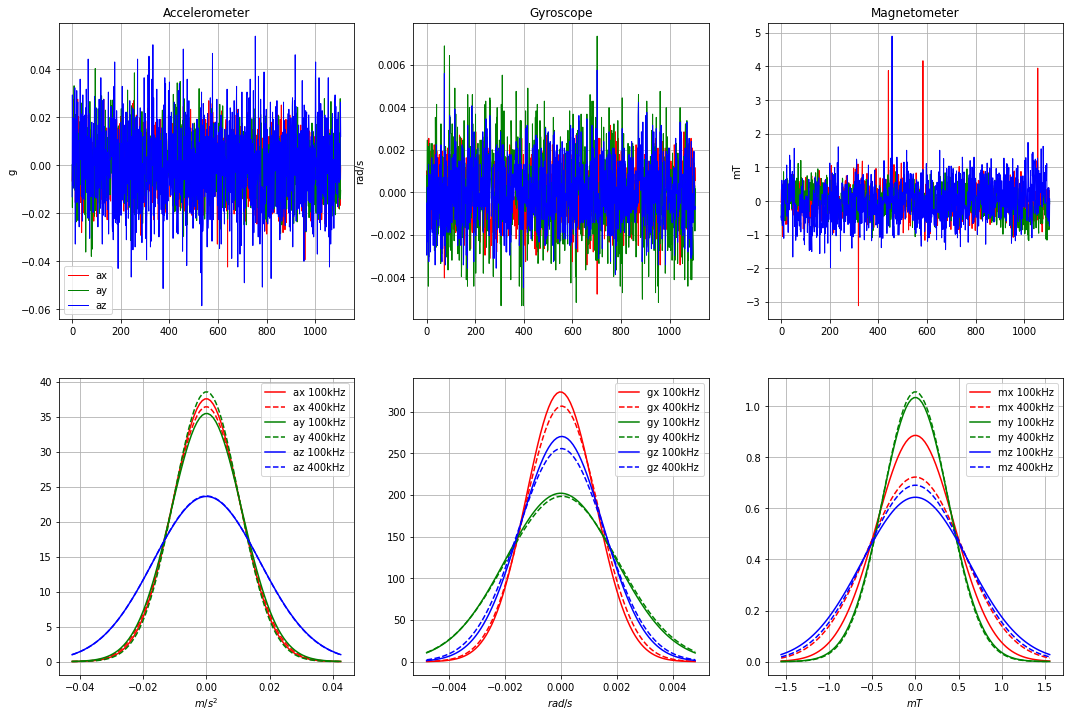

In [72]:
%matplotlib inline
acc_cal_1 = np.array([np.mean(data1["ax"]), np.mean(data1["ay"]), np.mean(data1["az"])]).round(4)
gyr_cal_1 = np.array([np.mean(data1["gx"]), np.mean(data1["gy"]), np.mean(data1["gz"])]).round(4)
mag_cal_1 = np.array([np.mean(data1["mx"]), np.mean(data1["my"]), np.mean(data1["mz"])]).round(4)

acc_cal_2 = np.array([np.mean(data2["ax"]), np.mean(data2["ay"]), np.mean(data2["az"])]).round(4)
gyr_cal_2 = np.array([np.mean(data2["gx"]), np.mean(data2["gy"]), np.mean(data2["gz"])]).round(4)
mag_cal_2 = np.array([np.mean(data2["mx"]), np.mean(data2["my"]), np.mean(data2["mz"])]).round(4)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0][0].set_title("Accelerometer")
axs[0][0].grid(True);
axs[0][0].plot(data1_x, data1["ax"] - acc_cal_1[0], color='r', linewidth=1, linestyle='-', label='ax');
axs[0][0].plot(data1_x, data1["ay"] - acc_cal_1[1], color='g', linewidth=1, linestyle='-', label='ay');
axs[0][0].plot(data1_x, data1["az"] - acc_cal_1[2], color='b', linewidth=1, linestyle='-', label='az');
axs[0][0].set(ylabel='g')
axs[0][0].legend();

axs[0][1].set_title("Gyroscope")
axs[0][1].grid(True);
axs[0][1].plot(data1_x, data1["gx"] - gyr_cal_1[0], color='r', linewidth=1, linestyle='-');
axs[0][1].plot(data1_x, data1["gy"] - gyr_cal_1[1], color='g', linewidth=1, linestyle='-');
axs[0][1].plot(data1_x, data1["gz"] - gyr_cal_1[2], color='b', linewidth=1, linestyle='-');
axs[0][1].set(ylabel='rad/s')

axs[0][2].set_title("Magnetometer")
axs[0][2].grid(True);
axs[0][2].plot(data1_x, data1["mx"] - mag_cal_1[0], color='r', linewidth=1, linestyle='-');
axs[0][2].plot(data1_x, data1["my"] - mag_cal_1[1], color='g', linewidth=1, linestyle='-');
axs[0][2].plot(data1_x, data1["mz"] - mag_cal_1[2], color='b', linewidth=1, linestyle='-');
axs[0][2].set(ylabel='mT');

x = np.linspace(np.min(data1["ax"] - acc_cal[0]), -np.min(data1["ax"] - acc_cal[0]), 100)
axs[1][0].plot(x, stats.norm.pdf(x, np.mean(data1["ax"] - acc_cal_1[0]), np.std(data1["ax"] - acc_cal_1[0])), color='r', linestyle='-', label="ax 100kHz");
axs[1][0].plot(x, stats.norm.pdf(x, np.mean(data2["ax"] - acc_cal_2[0]), np.std(data2["ax"] - acc_cal_2[0])), color='r', linestyle='--', label="ax 400kHz");
axs[1][0].plot(x, stats.norm.pdf(x, np.mean(data1["ay"] - acc_cal_1[1]), np.std(data1["ay"] - acc_cal_1[1])), color='g', linestyle='-', label="ay 100kHz");
axs[1][0].plot(x, stats.norm.pdf(x, np.mean(data2["ay"] - acc_cal_2[1]), np.std(data2["ay"] - acc_cal_2[1])), color='g', linestyle='--', label="ay 400kHz");
axs[1][0].plot(x, stats.norm.pdf(x, np.mean(data1["az"] - acc_cal_1[2]), np.std(data1["az"] - acc_cal_1[2])), color='b', linestyle='-', label="az 100kHz");
axs[1][0].plot(x, stats.norm.pdf(x, np.mean(data2["az"] - acc_cal_2[2]), np.std(data2["az"] - acc_cal_2[2])), color='b', linestyle='--', label="az 400kHz");
axs[1][0].grid(True);
axs[1][0].set(xlabel='$m/s^2$');
axs[1][0].legend();

x = np.linspace(np.min(data1["gx"] - gyr_cal[0]), -np.min(data1["gx"] - gyr_cal[0]), 100)
axs[1][1].plot(x, stats.norm.pdf(x, np.mean(data1["gx"] - gyr_cal_1[0]), np.std(data1["gx"] - gyr_cal_1[0])), color='r', linestyle='-', label="gx 100kHz");
axs[1][1].plot(x, stats.norm.pdf(x, np.mean(data2["gx"] - gyr_cal_2[0]), np.std(data2["gx"] - gyr_cal_2[0])), color='r', linestyle='--', label="gx 400kHz");
axs[1][1].plot(x, stats.norm.pdf(x, np.mean(data1["gy"] - gyr_cal_1[1]), np.std(data1["gy"] - gyr_cal_1[1])), color='g', linestyle='-', label="gy 100kHz");
axs[1][1].plot(x, stats.norm.pdf(x, np.mean(data2["gy"] - gyr_cal_2[1]), np.std(data2["gy"] - gyr_cal_2[1])), color='g', linestyle='--', label="gy 400kHz");
axs[1][1].plot(x, stats.norm.pdf(x, np.mean(data1["gz"] - gyr_cal_1[2]), np.std(data1["gz"] - gyr_cal_1[2])), color='b', linestyle='-', label="gz 100kHz");
axs[1][1].plot(x, stats.norm.pdf(x, np.mean(data2["gz"] - gyr_cal_2[2]), np.std(data2["gz"] - gyr_cal_2[2])), color='b', linestyle='--', label="gz 400kHz");
axs[1][1].grid(True);
axs[1][1].set(xlabel='$rad/s$');
axs[1][1].legend();

x = np.linspace(np.min(data1["mx"] - mag_cal[0])/2, -np.min(data1["mx"] - mag_cal[0])/2, 100)
axs[1][2].plot(x, stats.norm.pdf(x, np.mean(data1["mx"] - mag_cal_1[0]), np.std(data1["mx"] - mag_cal_1[0])), color='r', linestyle='-', label="mx 100kHz");
axs[1][2].plot(x, stats.norm.pdf(x, np.mean(data2["mx"] - mag_cal_2[0]), np.std(data2["mx"] - mag_cal_2[0])), color='r', linestyle='--', label="mx 400kHz");
axs[1][2].plot(x, stats.norm.pdf(x, np.mean(data1["my"] - mag_cal_1[1]), np.std(data1["my"] - mag_cal_1[1])), color='g', linestyle='-', label="my 100kHz");
axs[1][2].plot(x, stats.norm.pdf(x, np.mean(data2["my"] - mag_cal_2[1]), np.std(data2["my"] - mag_cal_2[1])), color='g', linestyle='--', label="my 400kHz");
axs[1][2].plot(x, stats.norm.pdf(x, np.mean(data1["mz"] - mag_cal_1[2]), np.std(data1["mz"] - mag_cal_1[2])), color='b', linestyle='-', label="mz 100kHz");
axs[1][2].plot(x, stats.norm.pdf(x, np.mean(data2["mz"] - mag_cal_2[2]), np.std(data2["mz"] - mag_cal_2[2])), color='b', linestyle='--', label="mz 400kHz");
axs[1][2].grid(True);
axs[1][2].set(xlabel='$mT$');
axs[1][2].legend();

# Conclusions

1. set I2C-clock based on your application (Gyro => 100kHz, Acc => 400kHz, Mag => 100kHz)
2. avoid Z-Axis for better accelerometer performance